### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [21]:
facturacion = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

facturacion



{'Tienda 1': np.float64(1150880400.0),
 'Tienda 2': np.float64(1116343500.0),
 'Tienda 3': np.float64(1098019600.0),
 'Tienda 4': np.float64(1038375700.0)}

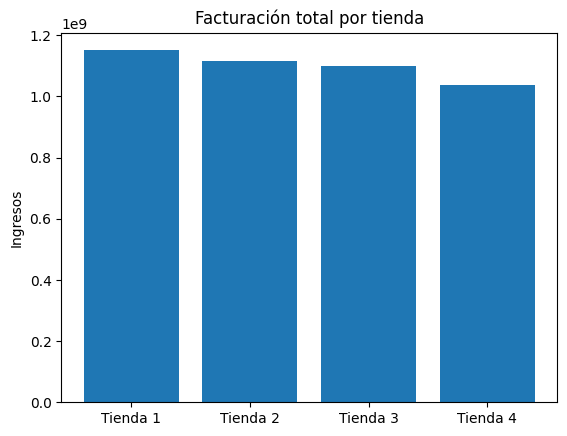

In [7]:

import matplotlib.pyplot as plt

plt.bar(facturacion.keys(), facturacion.values())
plt.title('Facturación total por tienda')
plt.ylabel('Ingresos')
plt.show()



# 2. Ventas por categoría

In [8]:
ventas_categoria_t1 = tienda['Categoría del Producto'].value_counts()
ventas_categoria_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_t4 = tienda4['Categoría del Producto'].value_counts()

ventas_categoria_t1


,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


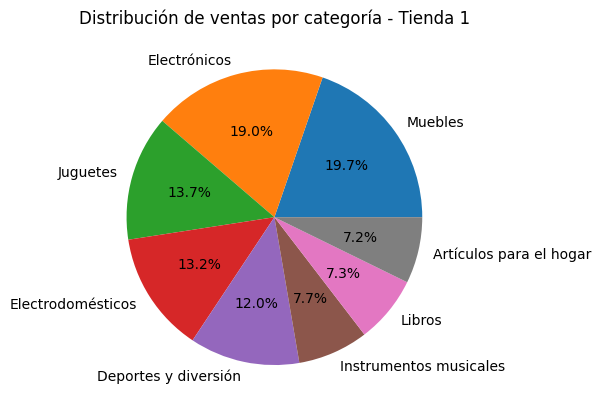

In [19]:
ventas_categoria_t1.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Distribución de ventas por categoría - Tienda 1'
)
plt.ylabel('')
plt.show()


# 3. Calificación promedio de la tienda


In [10]:
calificaciones = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

calificaciones


{'Tienda 1': np.float64(3.976685036032217),
 'Tienda 2': np.float64(4.037303942348453),
 'Tienda 3': np.float64(4.048325561678677),
 'Tienda 4': np.float64(3.9957591178965224)}

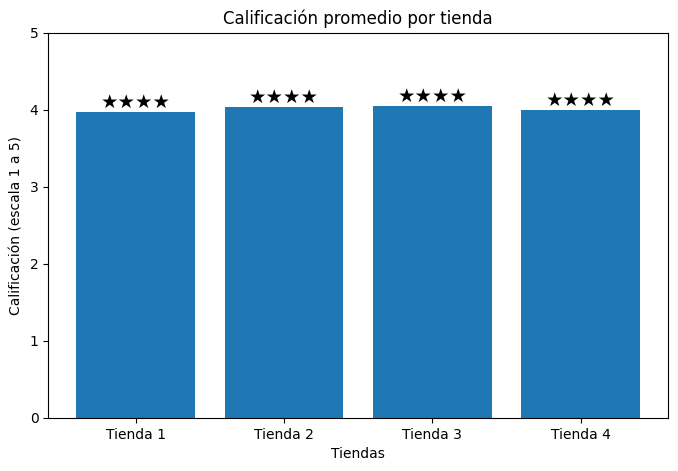

In [25]:
import matplotlib.pyplot as plt

# Diccionario con los resultados obtenidos
calificacion_promedio = {
    'Tienda 1': 3.976685036032217,
    'Tienda 2': 4.037303942348453,
    'Tienda 3': 4.048325561678677,
    'Tienda 4': 3.9957591178965224
}

# Preparar datos
tiendas = list(calificacion_promedio.keys())
valores = list(calificacion_promedio.values())

# Crear gráfico
plt.figure(figsize=(8,5))
plt.bar(tiendas, valores)
plt.ylim(0,5)
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación (escala 1 a 5)")
plt.xlabel("Tiendas")

# Agregar estrellas como representación visual
for i, v in enumerate(valores):
    estrellas = "★" * int(round(v))
    plt.text(i, v + 0.05, estrellas, ha='center', fontsize=14)

plt.show()


# 4. Productos más y menos vendidos

In [12]:
productos_t1 = tienda['Producto'].value_counts()

productos_t1.head(5)   # más vendidos
productos_t1.tail(5)   # menos vendidos


,count
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


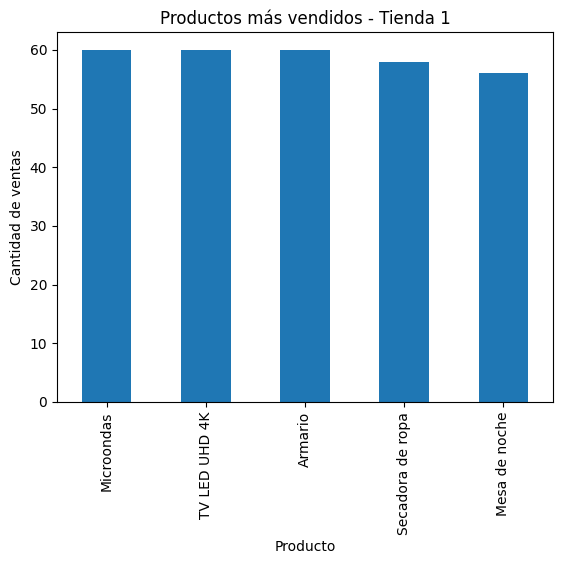

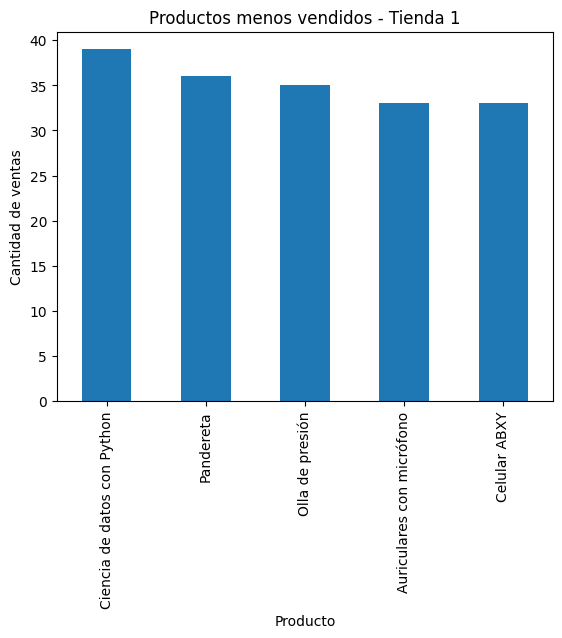

In [16]:
productos_t1 = tienda['Producto'].value_counts()
top_5 = productos_t1.head(5)
bottom_5 = productos_t1.tail(5)
top_5.plot(kind='bar', title='Productos más vendidos - Tienda 1')
plt.ylabel('Cantidad de ventas')
plt.show()

bottom_5.plot(kind='bar', title='Productos menos vendidos - Tienda 1')
plt.ylabel('Cantidad de ventas')
plt.show()




# 5. Envío promedio por tienda

In [18]:
envio_promedio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

envio_promedio


{'Tienda 1': np.float64(26018.60958033065),
 'Tienda 2': np.float64(25216.235693090293),
 'Tienda 3': np.float64(24805.680373039424),
 'Tienda 4': np.float64(23459.457167090754)}

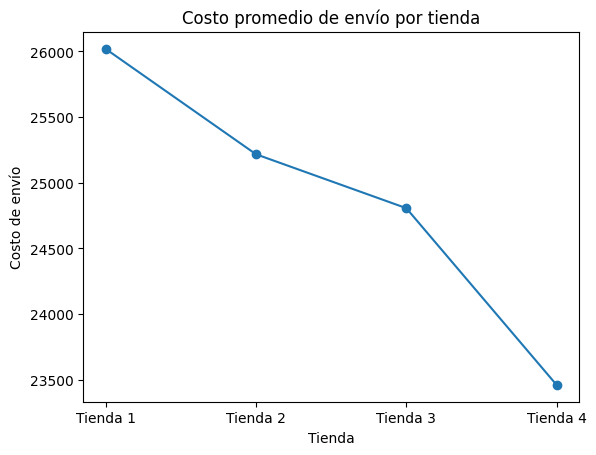

In [20]:
plt.plot(
    list(envio_promedio.keys()),
    list(envio_promedio.values()),
    marker='o'
)
plt.title('Costo promedio de envío por tienda')
plt.ylabel('Costo de envío')
plt.xlabel('Tienda')
plt.show()



**Informe Final de Análisis de Ventas**

*Recomendación de tienda para el Sr. Juan*

**1. Introducción**

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas a partir de un conjunto de datos de ventas, con el fin de recomendar al Sr. Juan en cuál de ellas le conviene vender sus productos.
El análisis considera múltiples factores relevantes para la toma de decisiones comerciales, entre ellos: facturación total, comportamiento de ventas por categoría, calificación promedio de los clientes, productos más y menos vendidos y costos de envío promedio por tienda.
La evaluación se apoya en los resultados obtenidos mediante el procesamiento de datos y la generación de visualizaciones estadísticas.

**2. Análisis de resultados**

**2.1 Facturación total por tienda**

Los ingresos totales obtenidos por cada tienda muestran el siguiente comportamiento:


*   Tienda 1: $1.150.880.400

*   Tienda 2: $1.116.343.500

*   Tienda 3: $1.098.019.600

*   Tienda 4: $1.038.375.700


La Tienda 1 presenta la mayor facturación acumulada, lo que indica un alto volumen de ventas y una capacidad probada para generar ingresos. No obstante, la diferencia con las tiendas 2 y 3 no es excesivamente amplia, por lo que resulta necesario analizar otros factores complementarios.

**2.2 Ventas por categoría de producto**

Las categorías con mayor cantidad de ventas fueron:



*   Muebles (465 ventas)
*   Electrónicos (448 ventas)
*   Juguetes (324 ventas)
*   Electrodomésticos (312 ventas)


En contraste, las categorías con menor volumen de ventas fueron:

*   Libros
*   Artículos para el hogar
*   Instrumentos musicales

Este comportamiento evidencia que los productos de alto valor unitario y uso cotidiano (como muebles y electrónicos) concentran la mayor demanda, lo cual es relevante para definir el tipo de productos que el Sr. Juan podría priorizar al vender.

**2.3 Calificación promedio de los clientes por tienda**

Las calificaciones promedio obtenidas son las siguientes:

*   Tienda 1: 3,98
*   Tienda 2: 4,04
*   Tienda 3: 4,05
*   Tienda 4: 4,00

La Tienda 3 destaca con la mejor valoración promedio por parte de los clientes, lo que sugiere un mayor nivel de satisfacción asociado al servicio, los productos o la experiencia de compra. La Tienda 1, pese a liderar en facturación, presenta la calificación más baja del grupo, lo que podría implicar riesgos reputacionales a largo plazo.

**2.4 Productos más vendidos**

Los productos con mayor cantidad de ventas fueron:

*   Ciencia de datos con Python (39 unidades)
*   Pandereta (36 unidades)
*   Olla de presión (35 unidades)
*   Auriculares con micrófono (33 unidades)
*   Celular ABXY (33 unidades)

Este resultado muestra una demanda diversa que abarca productos tecnológicos, educativos y de uso doméstico, lo cual refleja un mercado heterogéneo y oportunidades de venta en distintos segmentos.

**2.5 Costo promedio de envío por tienda**

El costo promedio de envío por tienda es el siguiente:

*   Tienda 1: $26.018
*   Tienda 2: $25.216
*   Tienda 3: $24.806
*   Tienda 4: $23.459

La Tienda 4 presenta el menor costo de envío promedio, lo que puede resultar atractivo para los clientes. Sin embargo, este factor debe evaluarse junto con la facturación y la satisfacción del consumidor, ya que un menor costo de envío no necesariamente se traduce en mayores ingresos.

**3. Conclusión y recomendación**

A partir del análisis integral de los datos, se concluye lo siguiente:

*   La Tienda 1 destaca por su mayor facturación, lo que indica una fuerte capacidad de venta, pero presenta la calificación promedio más baja y el costo de envío más alto, lo que podría afectar la experiencia del cliente.

*   La Tienda 4 ofrece los envíos más económicos, pero es la que registra la menor facturación total, lo que sugiere menor alcance comercial.

*   La Tienda 2 presenta resultados intermedios en casi todos los indicadores, sin destacar claramente en alguno.

*   La Tienda 3 logra el mejor equilibrio entre los factores analizados: buena facturación, la calificación promedio más alta y un costo de envío relativamente bajo.

**Recomendación final:**
Se recomienda que el Sr. Juan **venda sus productos en la Tienda 3**, ya que combina un sólido desempeño económico con un alto nivel de satisfacción de los clientes y costos de envío competitivos. Esta combinación reduce riesgos comerciales y aumenta la probabilidad de mantener ventas sostenidas en el tiempo, fortaleciendo la imagen del vendedor y la fidelización de los compradores.